In [1]:
import os
#import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import random

from sklearn import preprocessing

from joblib import load
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import PIL
from PIL import Image, ImageOps

Main paths for images directory

In [3]:
inputPath = "./data/source/"

In [4]:
inDir = "Test" # all data selected

### 1. Functions definitions

Processing of an image

In [5]:
def processImage(img):

    # auto tune histogram levels
    imgOut = PIL.ImageOps.autocontrast(img,preserve_tone=True)

    return imgOut

Convert and scale values of one image pixels to numpy array

In [6]:
# convert image in numpy array of float32 and scale beetween 0 and 1
def convImage(img):
    
    # convert to numpy array
    x = np.array(img)
    # convert to float (64 bits) and scale datas
    x = x / 255.0
    # cast to float32
    x = np.float32(x)
    
    #print(x.shape)
    
    return x

Processing an image and convert it to the format required for ResNet50

In [7]:
def imagePreProcessing(imageHandle):

    x = []
    
    imgOut = processImage(imageHandle)
    imgOut = PIL.ImageOps.fit(imgOut, (150,150))
    imgOut = convImage(imgOut)
    x.append(imgOut)
    x = np.array(x)
    model_resized_image = tf.image.resize(x, [224, 224])
    model_final_image = keras.applications.resnet50.preprocess_input(model_resized_image * 255)
    
    return model_final_image

High level function to get predict breed name from an image

In [8]:
def dogPrediction(imHandle):
    # set an image to format required by input layer of the model
    inShapeImage = imagePreProcessing(imHandle)
    # use ResNet5 model to make predicion
    probaPredictions = model.predict(inShapeImage)
    # Retrieve the name of the breed (higher probability)
    classIndex = np.argmax(probaPredictions)
    breedName = le.inverse_transform([classIndex])[0]
    
    return breedName

### 2.Loads  models

Load ResNet50 Model

In [9]:
model = keras.models.load_model("my_keras_model.h5")

Load Label Encoder

In [10]:
labels_filename = 'labelsEncoder.joblib'
le = load(labels_filename)

In [11]:
print(le.classes_)

['Bernese_mountain_dog' 'Siberian_husky' 'golden_retriever' 'komondor']


### 3. Predictions of breed name

In [12]:
dirPath = os.path.join(inputPath,inDir)
imList = os.listdir(dirPath)
imListNum = len(imList)

print(f"Input dirPath is {dirPath} with {imListNum} images")

Input dirPath is ./data/source/Test with 8 images


Shuffle the list

In [13]:
import random
random.shuffle(imList)

Make prediction on all images


Processing image file...  ./data/source/Test/n02105505_4417.jpg
1/1 [==============================] - 2s 2s/step


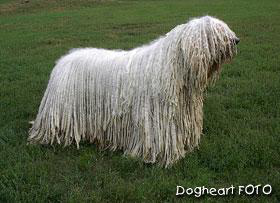

Dog selected breed is : komondor


Processing image file...  ./data/source/Test/n02099601_1259.jpg
1/1 [==============================] - 0s 250ms/step


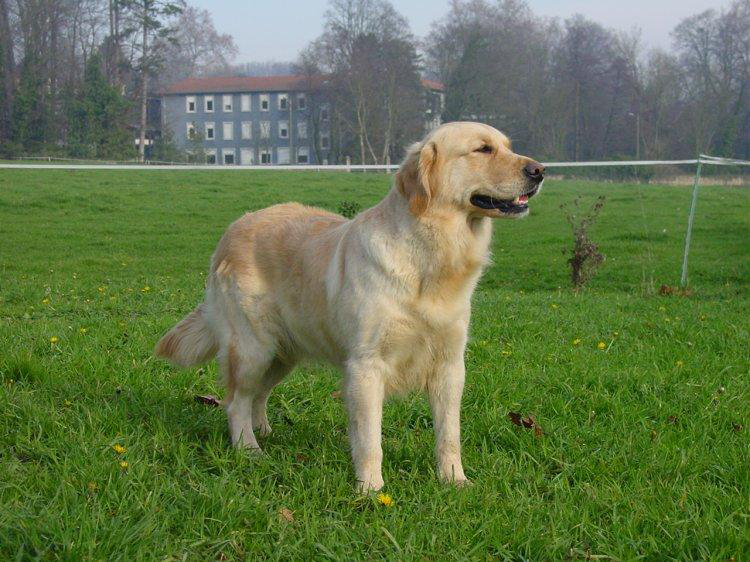

Dog selected breed is : golden_retriever


Processing image file...  ./data/source/Test/n02105505_1077.jpg
1/1 [==============================] - 0s 196ms/step


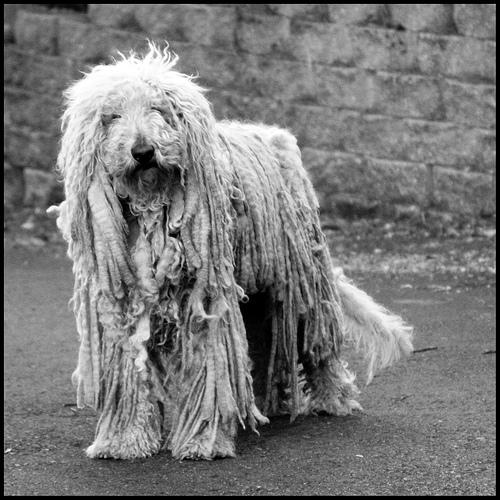

Dog selected breed is : komondor


Processing image file...  ./data/source/Test/n02099601_6194.jpg
1/1 [==============================] - 0s 172ms/step


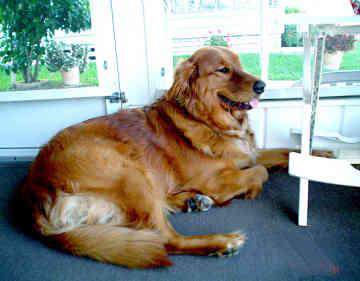

Dog selected breed is : golden_retriever


Processing image file...  ./data/source/Test/n02107683_4688.jpg
1/1 [==============================] - 0s 187ms/step


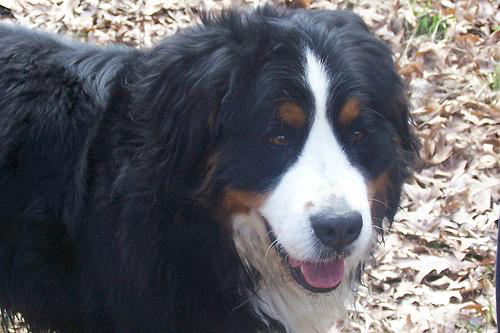

Dog selected breed is : Bernese_mountain_dog


Processing image file...  ./data/source/Test/n02110185_7936.jpg
1/1 [==============================] - 0s 185ms/step


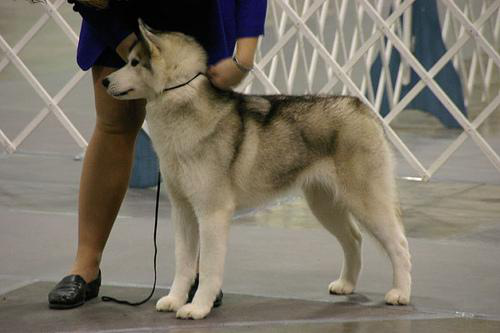

Dog selected breed is : Siberian_husky


Processing image file...  ./data/source/Test/n02110185_5159.jpg
1/1 [==============================] - 0s 162ms/step


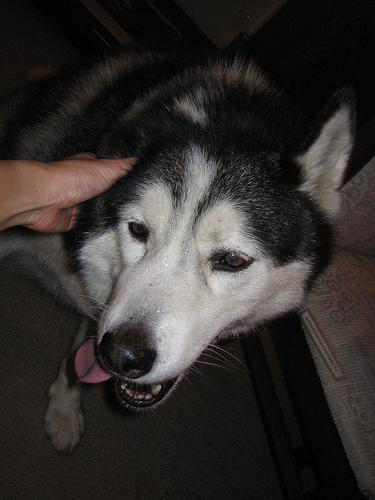

Dog selected breed is : Siberian_husky


Processing image file...  ./data/source/Test/n02107683_2137.jpg
1/1 [==============================] - 0s 160ms/step


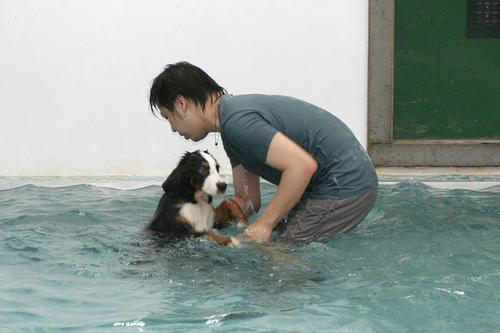

Dog selected breed is : Bernese_mountain_dog



In [14]:
for i,filename in enumerate(imList):
    imgName = inputPath + inDir + '/' + filename
    print("\nProcessing image file... ", imgName)
    testImg = Image.open(imgName)
    name = dogPrediction(testImg)
    display(testImg)
    print("Dog selected breed is : {}\n".format(name))